# House Prices - Advanced Regression Techniques
- Janatul Tuba
- ID: 1712257042

## Content

- Import Packages
- Load Data
- Handel Missing data (Null Value) and Categorical data Handle 
- Correlation matrix (in terms of target variable/feature) 
- Feature scaling to transform feature columns and target variable 
- supervised learning models implementation
   - Support Vector Machine 
   - Decision Tree 
   - Random Forest 
- PCA Perform 
- Implemnt Random Forest Algorithm
- Result

# Importing packages
- **numpy** and **pandas** to work with numbers and data
- **seaborn** and **matplotlib** to visualize data
- **Scipy** for normalization and skewing of data.

In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Loading data
loaded train and test data using Pandas functions

In [2]:
#Load train and test datasets in  pandas dataframe

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



# Explore Dataset

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#display size of train and test dataset

print ("Size of train data : {}" .format(train.shape))

print ("Size of test data : {}" .format(test.shape))

Size of train data : (1460, 81)
Size of test data : (1459, 80)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

> We can see some features are numeric while others are text. There are also missing values in the dataset. As this is a  large data the dataset we will  clean it by removing unnecessary colums 

**Drop the Id column because we dont need it currently.**

In [7]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [8]:
print ("Size of train data after dropping Id: {}" .format(train.shape))
print ("Size of test data after dropping Id: {}" .format(test.shape))

Size of train data after dropping Id: (1460, 80)
Size of test data after dropping Id: (1459, 79)


## Dealing with outliers


If training data is full of errors, outliers, and noise  it will make it harder for the system to detect the underlying
patterns, so your system is less likely to perform well. So, to perform the system well I will remove the outliers.

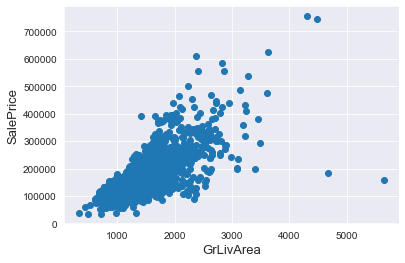

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

>Here, we can see that there are outlinear with low SalePrice and high GrLivArea. So, to perform the system well , I will remove it the house which are more than 4000 square feet

In [10]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

## Correlation Analysis

Correlation analysis is used to find two variables are related. Through the correlation analysis, we can evaluate correlation coefficient that tells how much one variable changes when the other one does. Correlation analysis provides a linear relationship between two variables.

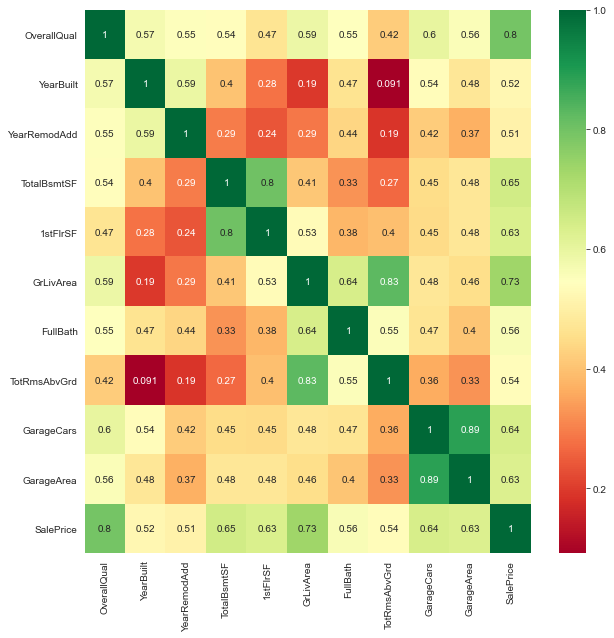

In [11]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

> - From this we can see  __OverallQual, GrLivArea and TotalBsmtSF__  are highly positively correlated with the SalePrice. 
> - __GarageCars and GarageArea__ also seems correlated with other, Since the no. of car that will fit into the garage will depend on GarageArea. 

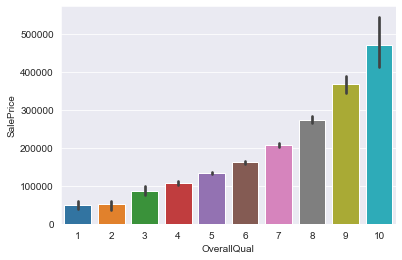

In [12]:
sns.barplot(train.OverallQual,train.SalePrice)

**Scatter plots between 'SalePrice' and correlated variables**

C:\Users\janna\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


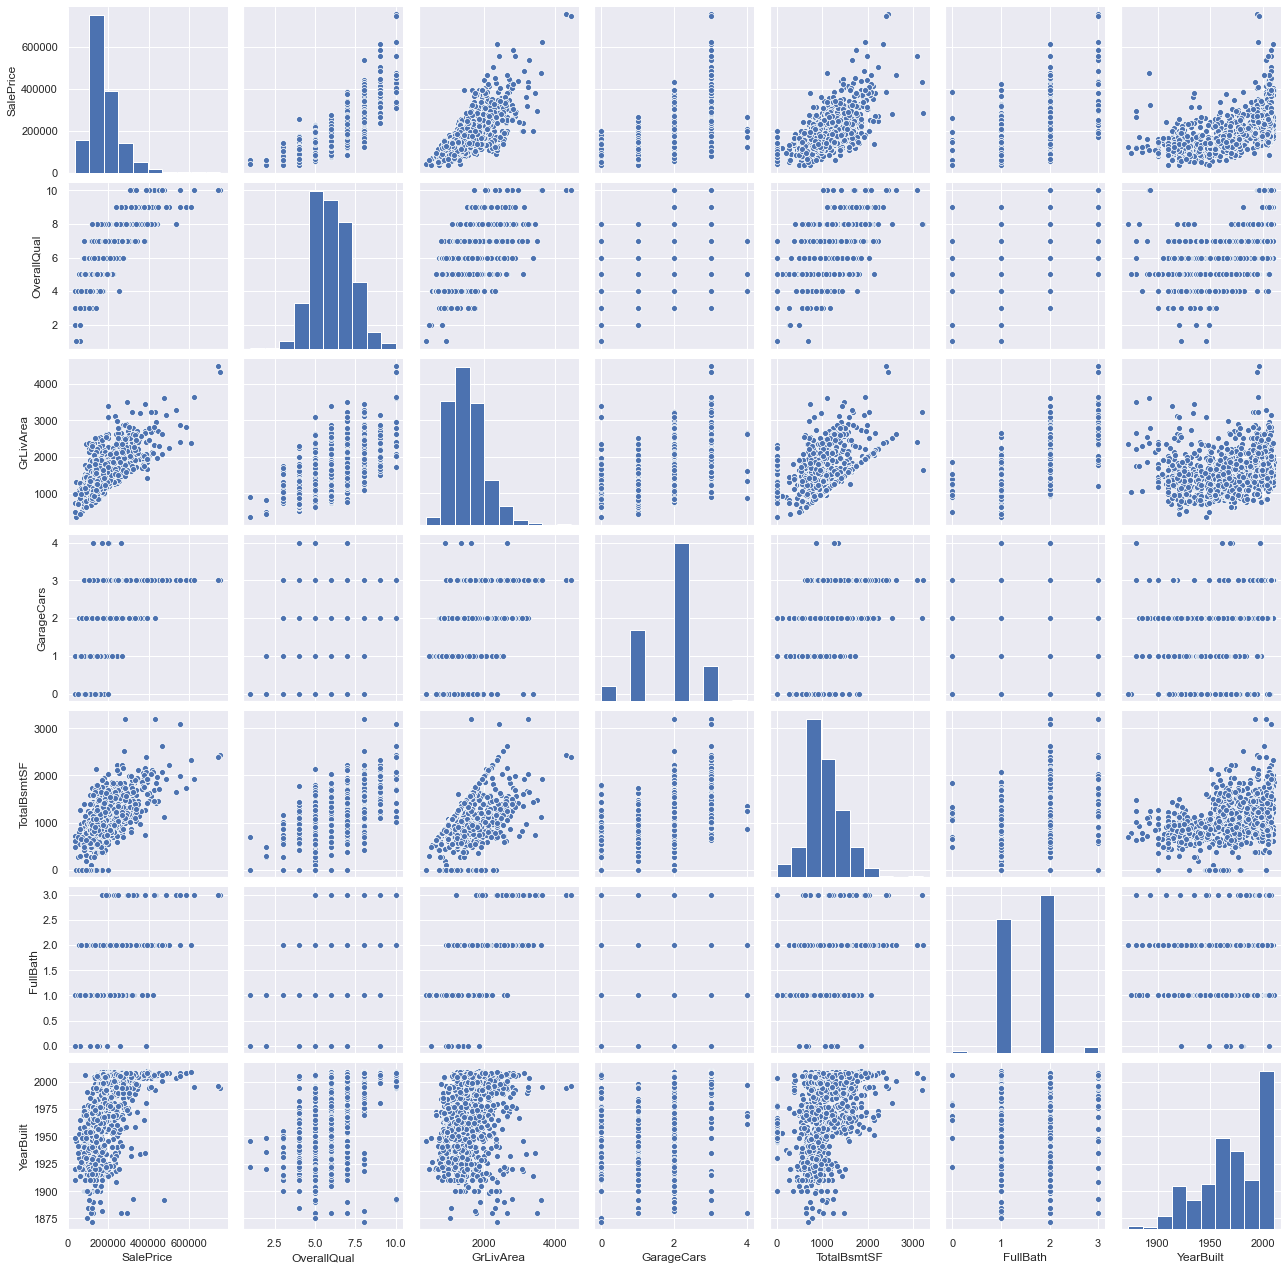

In [13]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

>In the  figures between __'TotalBsmtSF'__ and __'GrLiveArea'__ ,we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area

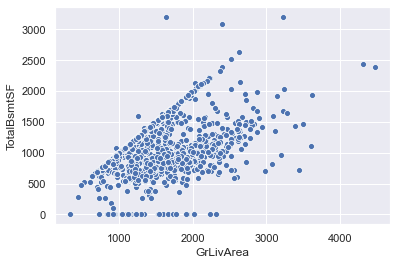

In [14]:
sns.scatterplot(train.GrLivArea,train.TotalBsmtSF)

## Target Variable Transform
Different features in the data set may have values in different ranges. For example, in this data set, the range of SalePrice feature may lie from thousands to lakhs but the range of values of YearBlt feature will be in thousands. That means a column is more weighted compared to other.




### Check the skewness
skewness occurs when some classes are much more frequent than others.


 mu = 180932.92 and sigma = 79467.79



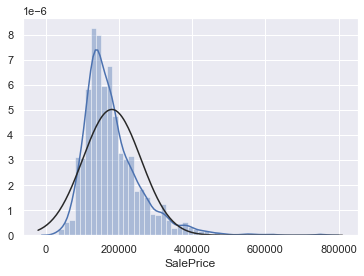

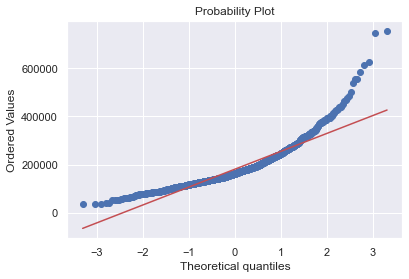

In [15]:
def check_skewness(col):
    sns.distplot(train[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
check_skewness('SalePrice')

>**This distribution is positively skewed.** Here we can see that, the black curve is more deviated towards the right. We will remove  skewness to make good decisions by the model.

## Solving skewness
Here I have used **log transform** of the same data, with the intent to reduce the skewness.


 mu = 12.02 and sigma = 0.40



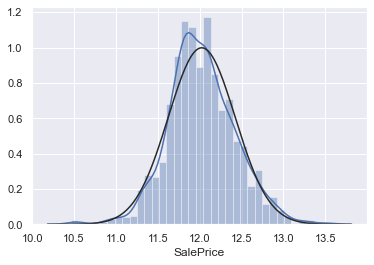

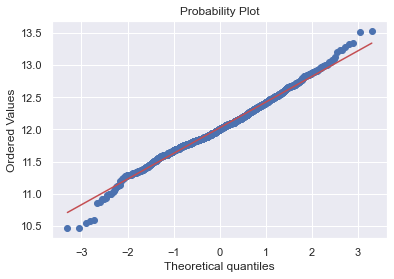

In [16]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

check_skewness('SalePrice')

>After taking logarithm of the same data the curve seems to be normally distributed, although not perfectly normal, this is sufficient to fix the issues from a skewed dataset as we saw before.



# Feature Engineering

The system will only be capable of learning if the training data contains enough relevant features and not too many irrelevant
ones. A critical part of the success of a Machine Learning project is coming up with a good set of features to train on. This process, called __feature engineering__. feature engineering involves thefollowing steps:
- Feature selection (selecting the most useful features to train on among existing
features)
-  Feature extraction (combining existing features to produce a more useful one as we saw earlier, dimensionality reduction algorithms can help)
- Creating new features by gathering new data


**Concatenate both train and test values.**

In [17]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
#a = all_data.drop(['SalePrice'], axis=1)

print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


# Missing Data

In [18]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

Text(0.5, 1.0, 'Percent missing data by feature')

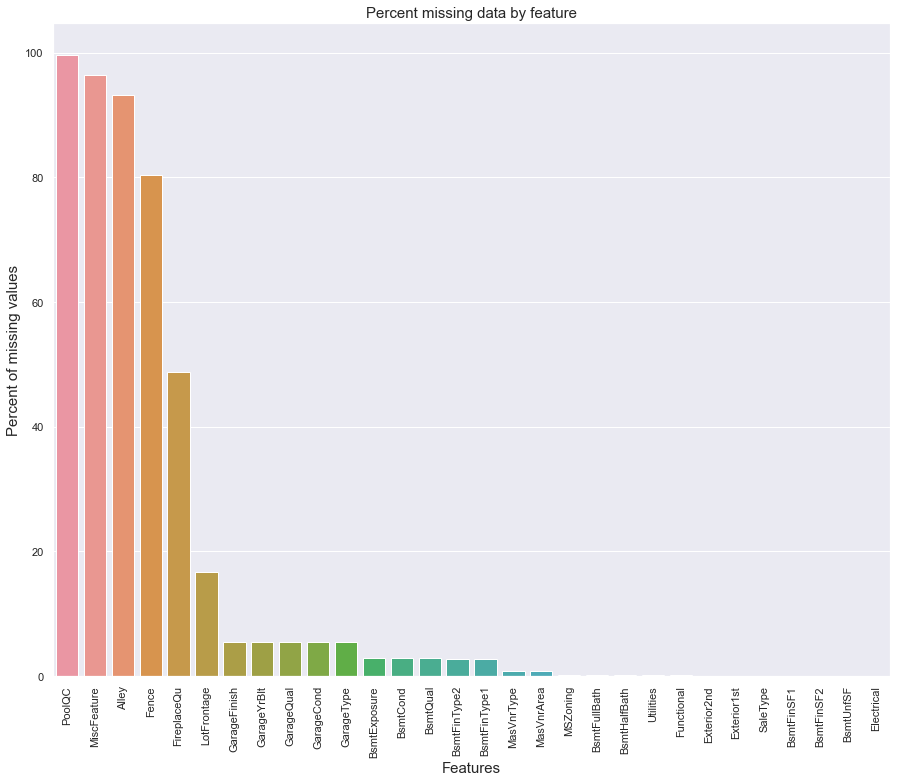

In [19]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [20]:
all_data.PoolQC.loc[all_data.PoolQC.notnull()]

197     Ex
809     Fa
1169    Gd
1181    Ex
1384    Fa
1421    Gd
1972    Ex
2571    Ex
2708    Gd
Name: PoolQC, dtype: object

In [21]:
# Find columns with missing values and their percent missing
train.isnull().sum()                                                     
miss_val = train.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=train.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/train.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
PoolQC,1452,99.59
MiscFeature,1404,96.30
Alley,1367,93.76
Fence,1177,80.73
FireplaceQu,690,47.33
LotFrontage,259,17.76
GarageType,81,5.56
GarageCond,81,5.56
GarageFinish,81,5.56
GarageQual,81,5.56


>We'll remove those features with a high percent of missing values such as __PoolQC, MiscFeature, Alley, Fence, and FireplaceQu__. Note that the LotFrontage feature has only around 16% missing. This is relatively low so we can choose to replace the NaN values with the imputed mean of the column.GarageType,  GarageFinish, GarageQual,  GarageCond, GarageYrBlt,  GarageArea,  GarageCars  these all features have same percentage of null values.We will remove the remainder rows with missing values.

# Handle Missing Data

As __PoolQC__ has the highest null values.Here we will replace those null values with 'None'.

In [22]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

* **MiscFeature** : Data documentation says NA means "no misc feature"

In [23]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

* **Alley** : data description says NA means "no alley access"


In [24]:
all_data["Alley"] = all_data["Alley"].fillna("None")

* **Fence** : data description says NA means "no fence"


In [25]:
all_data["Fence"] = all_data["Fence"].fillna("None")

* **FireplaceQu** : data description says NA means "no fireplace"

In [26]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

* **LotFrontage** : As the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [27]:
# Grouping by Neighborhood and Check the LotFrontage. Most of the grouping has similar areas
grouped_df = all_data.groupby('Neighborhood')['LotFrontage']

for key, item in grouped_df:
    print(key,"\n")
    print(grouped_df.get_group(key))
    break

Blmngtn 

219     43.0
229     43.0
385     43.0
443     53.0
465      NaN
558      NaN
596     53.0
638     53.0
789     43.0
850      NaN
981     43.0
1003    43.0
1018    43.0
1022    43.0
1125    53.0
1392    53.0
1413    51.0
1481    43.0
1683    43.0
1982     NaN
1983     NaN
1984    53.0
2318     NaN
2319    53.0
2669    43.0
2670     NaN
2671     NaN
2672    43.0
Name: LotFrontage, dtype: float64


In [28]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

* **GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None. 

In [29]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')

In [30]:
abc = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt', 'GarageArea', 'GarageCars']
all_data.groupby('GarageType')[abc].count()

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageArea,GarageCars
GarageType,,,,,,,
2Types,23,23,23,23,23,23,23
Attchd,1722,1722,1722,1722,1722,1722,1722
Basment,36,36,36,36,36,36,36
BuiltIn,185,185,185,185,185,185,185
CarPort,15,15,15,15,15,15,15
Detchd,779,779,779,779,777,778,778
None,157,157,157,157,0,157,157


* **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [31]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

* **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [32]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

* **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no basement.

In [33]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

* **MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [34]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

* **MSZoning (The general zoning classification)** : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [35]:
all_data['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [36]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

* **Utilities** : Since this is a categorical data and most of the data are of same category, Its not gonna effect on model. So we choose to drop it.

In [37]:
all_data['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [38]:
all_data = all_data.drop(['Utilities'], axis=1)

* **Functional** : data description says NA means typical

In [39]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

* **Electrical,KitchenQual, Exterior1st, Exterior2nd, SaleType** : Since this all are categorical values so its better to replace nan values with the most used keyword.

In [40]:
mode_col = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_col:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

* **MSSubClass** : Na most likely means No building class. We can replace missing values with None


In [41]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

## check  missing values

In [42]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


**Now there any many features that are numerical but categorical.**

In [43]:
all_data['OverallCond'].value_counts()

5    1643
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

**Converting some numerical variables that are really categorical type.**

Here, we can see the category range from 1 to 9 which are numerical (**not ordinal type**). Since its categorical we need to change it to String type.If we do not convert these to categorical, some model may get affect by this as model will compare the value 1<5<10 . We dont need that to happen with our model.

In [44]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

## Label Encoding 
we can’t have text in our data if we’re going to run any kind of model on it.So, we need to make this data ready for the model and to convert this kind of categorical text data into model understandable numerical data, we use the Label Encoder class.

Here,Label Encoder will categorize 'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold' as 0, 1, 2,..................

In [45]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


- Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [46]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Check highly skewed features

In [47]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


## Box Cox Transformation of (highly) skewed features

While dealing with real-world data, we are going to deal with features that are heavily skewed. Transformation technique is useful to **stabilize variance**, make the data **more normal distribution-like**, improve the validity of measures of association.

In [48]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


**Getting dummy categorical features**

In [49]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 220)

# Creating train and test data.
Before we can start modeling the data, we need to split the dataset into training and test sets. We will train the models with the training set and cross-validate with the test set. 

In [50]:
train = all_data[:ntrain]
test = all_data[ntrain:]
train.shape

(1458, 220)

# Modelling

1. Importing Libraries

2. We will use models
   
   - Support Vector Machine 
   - Decision Tree 
   - Random Forest 
   
3. Find the Cross Validation Score.
4. Calculate the mean of all model's prediction.
5. Create CSV file.
 

In [51]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.kernel_ridge import KernelRidge
#from sklearn.pipeline import make_pipeline
f#rom sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## Cross Validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.It's simple way to calculate error for evaluation. 

**KFold( )** splits the train/test data into k consecutive folds, we also have made shuffle attrib to True.

**cross_val_score ( )** evaluate a score by cross-validation.

In [52]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Modelling
Since in this dataset we have a large set of features. So to make our model avoid Overfitting and noisy we will use Regularization.
These model have Regularization parameter.

Regularization will reduce the magnitude of the coefficients.

# RandomForestRegressor

In [53]:

from sklearn.ensemble import RandomForestRegressor

# create regressor object
Randomregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
score = rmsle_cv(Randomregressor)
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest score: 0.1379 (0.0045)



# DecisionTreeRegressor
- It can be used for both Classification and Regression problems

In [54]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
Decisionregressor = DecisionTreeRegressor(max_depth=1)

score = rmsle_cv(Decisionregressor)
print("Decision Tree Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Decision Tree Regression score: 0.2932 (0.0076)



# Support Vector Machine

In [55]:
from sklearn.svm import SVR
SupportVectorregressor = SVR(kernel = 'rbf')
score = rmsle_cv(SupportVectorregressor)
print("Support Vector Machine score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Support Vector Machine score: 0.1433 (0.0057)



### Fit the training dataset on every model

In [56]:
RandomregressorMd = Randomregressor.fit(train.values,y_train)
DecisionregressorMd = Decisionregressor.fit(train.values,y_train)
SupportVectorregressorMd = SupportVectorregressor.fit(train.values,y_train)

## Mean of all model's prediction.
np.expm1 ( ) is used to calculate exp(x) - 1 for all elements in the array. 

In [57]:
finalMd = (np.expm1(RandomregressorMd.predict(test.values)) + np.expm1(DecisionregressorMd.predict(test.values)) + np.expm1(SupportVectorregressorMd.predict(test.values))) / 3
finalMd

array([129827.69255241, 158769.41171899, 169059.48707329, ...,
       157005.28728647, 119055.04393447, 230795.64126887])

# PCA

Principal Component Analysis, or PCA, is a statistical method used to reduce the number of variables in a dataset. It does so by lumping highly correlated variables together. Naturally, this comes at the expense of accuracy. As, we  have many variables and some of them are highly correlated, we can trade a little accuracy for simplicity. 

High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set.  

PCA can also be used to filter noisy datasets, such as image compression. 

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_training_data = scaler.fit_transform(train)
scaled_test_data = scaler.fit_transform(test)

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_transformed_data = pca.fit_transform(scaled_training_data)
pca_transformed_data.shape


(1458, 8)

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca_transformed_data_test = pca.fit_transform(scaled_test_data)
pca_transformed_data_test.shape
print(pca_transformed_data_test)

[[-2.4999091  -2.76514888  0.76925762 ... -0.71020658 -2.44228831
   0.4669068 ]
 [-0.3554263  -4.87630997 -2.55034656 ... -0.07331597  1.00278053
  -2.70781836]
 [ 2.18860104  1.36643032 -1.12827933 ...  0.87382821 -1.27324479
   1.68121402]
 ...
 [-0.19144881 -2.1333519  -1.34796346 ... -0.28645864 -2.2230301
   0.58024555]
 [-3.2973359  -1.33138495 -0.57164384 ...  7.08933965 -0.99060898
   0.37067878]
 [ 3.29921669 -0.4469792  -1.4156849  ...  1.10225039  1.73799175
   0.34000288]]


In [62]:
pca_transformed_data

array([[-3.30143672, -1.14700173,  0.11873405, ..., -1.53628382,
         0.38776934, -0.05735567],
       [ 0.35092764,  2.83821534, -0.51635762, ..., -0.07966737,
         0.65579774,  0.00897101],
       [-3.66999617, -0.70776238,  0.46274323, ..., -1.6166421 ,
         0.83120641, -0.19853512],
       ...,
       [-0.67321722, -0.9589991 ,  3.39290155, ...,  3.07046852,
         0.61757209, -3.01030816],
       [ 3.08555198,  2.7825392 , -1.71079999, ..., -0.1219555 ,
        -0.79594928,  0.17219658],
       [ 0.87037694,  3.22157522, -1.17826322, ..., -0.85586193,
         0.18768555, -1.35038503]])

In [63]:
pca_transformed_data_test

array([[-2.4999091 , -2.76514888,  0.76925762, ..., -0.71020658,
        -2.44228831,  0.4669068 ],
       [-0.3554263 , -4.87630997, -2.55034656, ..., -0.07331597,
         1.00278053, -2.70781836],
       [ 2.18860104,  1.36643032, -1.12827933, ...,  0.87382821,
        -1.27324479,  1.68121402],
       ...,
       [-0.19144881, -2.1333519 , -1.34796346, ..., -0.28645864,
        -2.2230301 ,  0.58024555],
       [-3.2973359 , -1.33138495, -0.57164384, ...,  7.08933965,
        -0.99060898,  0.37067878],
       [ 3.29921669, -0.4469792 , -1.4156849 , ...,  1.10225039,
         1.73799175,  0.34000288]])

Text(0, 0.5, 'Second Principal Component')

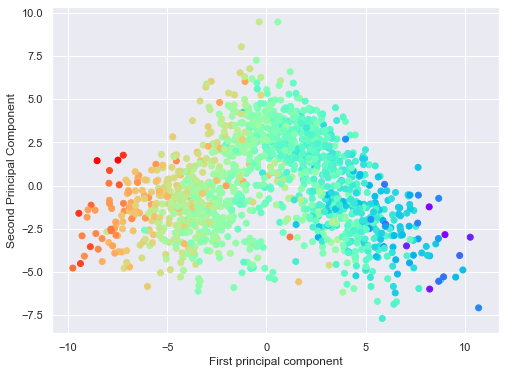

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(pca_transformed_data[:,0],pca_transformed_data[:,1],c=y_train,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Submission

In [65]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = finalMd
sub.to_csv('submission.csv',index=False)

In [66]:
print("done")

done
